In [1]:
import pandas as pd
import sqlalchemy 
from urllib import parse

In [2]:
user = 'encore'
password = '123'
host='192.168.0.95'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [3]:
try:
    with engine.connect() as connection:
        print("Database connection successful!")
except Exception as e:
    print(f"Database connection failed: {e}")

Database connection successful!


In [4]:
kbo = pd.read_sql_query("select * from kbo", con=engine)

kbo.to_csv("./kbo.csv", index=False, encoding='utf-8-sig')

In [5]:
display(kbo.head(3))
display(kbo.tail(3))

index  선수명     등번호           생년월일        포지션                    경력  입단 계약금  \
0      0  강동훈  No.034  2000년 11월 23일   투수(우투우타)     천안남산초-청주중-청주고-중앙대  7000만원   
1      1  강민제  No.038  2005년 02월 10일  내야수(우투우타)       군산중앙초-군산중-군산상일고  4000만원   
2      2  강이준   No.36  1998년 04월 07일   투수(우투우타)  발산초-덕수중-구리인창고-KIA-상무  7000만원   

       연봉                 지명순위   입단년도      team   신장  체중        BMI  
0  3000만원     24 KIA 5라운드 46순위         KIA 타이거즈  185  98  28.634039  
1  3000만원     24 KIA 9라운드 86순위         KIA 타이거즈  181  82  25.029761  
2  3000만원  17 KIA 2차 4라운드 34순위  19KIA  KIA 타이거즈  190  86  23.822715

index   선수명    등번호           생년월일       포지션                          경력  \
910    913   하영민  No.50  1995년 05월 07일  투수(우투우타)          광주수창초-진흥중-진흥고-히어로즈   
911    914  헤이수스  No.54  1996년 12월 10일  투수(좌투좌타)  베네수엘라 Juanita Hernandez(고)   
912    915   후라도  No.75  1996년 01월 30일  투수(우투우타)      파나마 San Judas Tadeo(고)   

      입단 계약금         연봉               지명순위  입단년도     team   신장   체중        BMI  
910  15000만원     8000만원  14 넥센 2차 1라운드 4순위  14넥센  키움 히어로즈  183   74  22.096808  
911            600000달러         24 키움 자유선발  24키움  키움 히어로즈  192  104  28.211806  
912           1200000달러         23 키움 자유선발  23키움  키움 히어로즈  187  109  31.170465

In [ ]:
kbo.shape

In [ ]:
kbo.isnull().sum()

In [ ]:
kbo.columns

In [14]:
kbo.drop(['index'], axis=1, inplace=True)

In [ ]:
kbo = kbo[['BMI','선수명', '등번호', '생년월일', '포지션', '경력', '입단 계약금', '연봉', '지명순위',
       '입단년도', 'team', '신장', '체중', ]].copy()

In [ ]:
kbo.team.value_counts() / kbo.team.value_counts().sum() * 100

In [ ]:
kbo.team.value_counts(normalize=True)

In [ ]:
kbo.loc[ kbo.team == "고양 히어로즈", 'team'] = '키움 히어로즈'

In [ ]:
kbo.team.value_counts(normalize=True)

In [ ]:
kbo['신장'].value_counts().sort_index().plot(kind='bar')

In [ ]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [ ]:
print([matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list])

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'NanumGothic'

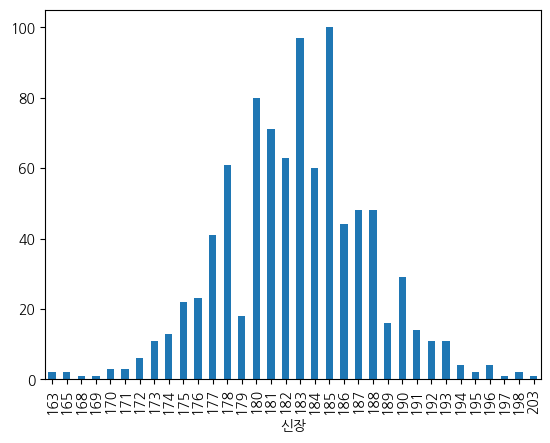

In [8]:
kbo['신장'].value_counts().sort_index().plot(kind='bar')
plt.show()

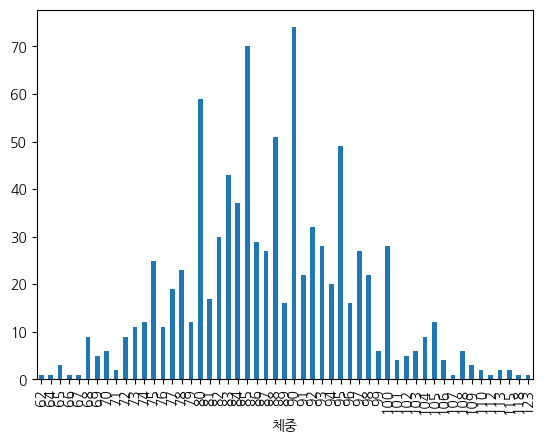

In [9]:
kbo['체중'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [105]:
국내선수 = kbo[kbo.연봉.str.find("만원") > -1].copy()
용병     = kbo[~(kbo.연봉.str.find("만원") > -1)].copy()

In [24]:
국내선수.shape

(832, 13)

In [106]:
import re 
p = re.compile("[0-9]+")
p.findall("111만원")
국내선수['연봉(만원)'] = 국내선수['연봉'].apply(lambda x : int(p.findall(x)[0]))

In [107]:
국내선수['연봉(만원)'] = 국내선수['연봉'].apply(lambda x : int(p.findall(x)[0]))

In [108]:
국내선수.drop("연봉", axis=1, inplace=True)

In [109]:
국내선수.loc[국내선수.team == "고양 히어로즈", 'team'] = '키움 히어로즈'

In [110]:
국내선수.groupby(['team'])[['연봉(만원)']].mean().sort_values(by=['연봉(만원)'], 
                          ascending=False  )

연봉(만원)
team                  
LG 트윈스    12426.923077
SSG 랜더스   12325.925926
롯데 자이언츠   11950.000000
한화 이글스    11534.117647
KT 위즈     11525.287356
삼성 라이온즈   11304.938272
KIA 타이거즈  10161.445783
두산 베어스    10155.000000
NC 다이노스    9031.034483
키움 히어로즈    8468.421053
상무         5950.000000

In [111]:
국내선수.sort_values(by=['연봉(만원)'], ascending=False).head(5)

선수명    등번호           생년월일        포지션                               경력  \
662  류현진  No.99  1987년 03월 25일   투수(좌투우타)   창영초-동산중-동산고-(대전대)-한화-LA다저스-토론토   
213  박동원  No.27  1990년 04월 07일   포수(우투우타)  양정초-개성중-개성고-히어로즈-상무-히어로즈-키움-KIA   
96   구자욱   No.5  1993년 02월 12일  외야수(우투좌타)                본리초-경복중-대구고-삼성-상무   
368  고영표   No.1  1991년 09월 16일   투수(우언우타)              광주대성초-광주동성중-화순고-동국대   
289  김재환  No.32  1988년 09월 22일  외야수(우투좌타)               영랑초-상인천중-인천고-두산-상무   

      입단 계약금                  지명순위    입단년도     team   신장   체중        BMI  \
662  25000만원     06 한화 2차 1라운드 2순위    06한화   한화 이글스  190  113  31.301939   
213   6000만원  09 히어로즈 2차 3라운드 19순위  09히어로즈   LG 트윈스  178   92  29.036738   
96   13000만원       12 삼성 2라운드 12순위    12삼성  삼성 라이온즈  189   75  20.996053   
368  13000만원    14 KT 2차 1라운드 10순위    14KT    KT 위즈  187   88  25.165146   
289  15000만원     08 두산 2차 1라운드 4순위    08두산   두산 베어스  183   90  26.874496   

     연봉(만원)  
662  250000  
213  250000  
96   200000  
368  200000  
289  150000

In [112]:
국내선수.groupby(['team'])[['연봉(만원)']].agg(['mean', 'median', 'var', 'std', 'min', 'max', 'count'])

연봉(만원)                                                        
                  mean  median           var           std   min     max count
team                                                                          
KIA 타이거즈  10161.445783  3600.0  2.958734e+08  17200.970132  3000  100000    83
KT 위즈     11525.287356  3500.0  6.104791e+08  24707.875679  3000  200000    87
LG 트윈스    12426.923077  3250.0  9.668386e+08  31094.028629  3000  250000    78
NC 다이노스    9031.034483  3200.0  2.593982e+08  16105.844023  3000  100000    87
SSG 랜더스   12325.925926  3100.0  5.307454e+08  23037.913196  3000  110000    81
두산 베어스    10155.000000  3300.0  3.902202e+08  19753.992706  3000  150000    80
롯데 자이언츠   11950.000000  3800.0  5.754043e+08  23987.585524  3000  135000    82
삼성 라이온즈   11304.938272  4100.0  5.857810e+08  24202.912538  3000  200000    81
상무         5950.000000  3200.0  3.119727e+07   5585.451882  3000   19000    12
키움 히어로즈    8468.421053  3300.0  2.015643e+08  14197.335060  1500   68000    76
한화 이글스    11534.117647  3400.0  8.916004e+08  29859.677991  3000  250000    85

In [113]:
국내선수.sort_values(by=['연봉(만원)'], ascending=False).groupby('team').first()

선수명    등번호           생년월일        포지션  \
team                                             
KIA 타이거즈  최형우  No.34  1983년 12월 16일  외야수(우투좌타)   
KT 위즈     고영표   No.1  1991년 09월 16일   투수(우언우타)   
LG 트윈스    박동원  No.27  1990년 04월 07일   포수(우투우타)   
NC 다이노스   박민우   No.2  1993년 02월 06일  내야수(우투좌타)   
SSG 랜더스   박종훈  No.50  1991년 08월 13일   투수(우언우타)   
두산 베어스    김재환  No.32  1988년 09월 22일  외야수(우투좌타)   
롯데 자이언츠   박세웅  No.21  1995년 11월 30일   투수(우투우타)   
삼성 라이온즈   구자욱   No.5  1993년 02월 12일  외야수(우투좌타)   
상무        김재웅   No.3  1998년 10월 22일   투수(좌투좌타)   
키움 히어로즈   이형종  No.36  1989년 06월 07일  외야수(우투우타)   
한화 이글스    류현진  No.99  1987년 03월 25일   투수(좌투우타)   

                                       경력   입단 계약금                  지명순위  \
team                                                                       
KIA 타이거즈            진북초-전주동중-전주고-삼성-경찰-삼성   5000만원    02 삼성 2차 6라운드 48순위   
KT 위즈                 광주대성초-광주동성중-화순고-동국대  13000만원    14 KT 2차 1라운드 10순위   
LG 트윈스    양정초-개성중-개성고-히어로즈-상무-히어로즈-키움-KIA   6000만원  09 히어로즈 2차 3라운드 19순위   
NC 다이노스                마포초(용산구리틀)-선린중-휘문고  16000만원        12 NC 1라운드 9순위   
SSG 랜더스           군산중앙초-군산중-군산상고-SK-상무-SK  10000만원        10 SK 2라운드 9순위   
두산 베어스                 영랑초-상인천중-인천고-두산-상무  15000만원     08 두산 2차 1라운드 4순위   
롯데 자이언츠                  대구경운초-경운중-경북고-KT  20000만원              14 KT 1차   
삼성 라이온즈                 본리초-경복중-대구고-삼성-상무  13000만원       12 삼성 2라운드 12순위   
상무               금교초(남양주리틀)-자양중-덕수고-키움-상무   5000만원    17 넥센 2차 6라운드 57순위   
키움 히어로즈                    화곡초-양천중-서울고-LG  43000만원              08 LG 1차   
한화 이글스     창영초-동산중-동산고-(대전대)-한화-LA다저스-토론토  25000만원     06 한화 2차 1라운드 2순위   

            입단년도   신장   체중        BMI  연봉(만원)  
team                                           
KIA 타이거즈    02삼성  180  106  32.716049  100000  
KT 위즈       14KT  187   88  25.165146  200000  
LG 트윈스    09히어로즈  178   92  29.036738  250000  
NC 다이노스     12NC  185   80  23.374726  100000  
SSG 랜더스     10SK  186   90  26.014568  110000  
두산 베어스      08두산  183   90  26.874496  150000  
롯데 자이언츠     14KT  182   85  25.661152  135000  
삼성 라이온즈     12삼성  189   75  20.996053  200000  
상무          19키움  171   86  29.410759   19000  
키움 히어로즈     08LG  183   87  25.978680   68000  
한화 이글스      06한화  190  113  31.301939  250000

In [114]:
from datetime import date, datetime, timedelta

In [115]:
(datetime.now() - datetime.strptime('2000년 11월 23일', "%Y년 %m월 %d일")).days / 365

23.994520547945207

In [116]:
datetime.now().year - datetime.strptime('2000년 11월 23일', "%Y년 %m월 %d일").year

24

In [117]:
국내선수['나이'] = 국내선수['생년월일'].apply(lambda x : 
                   datetime.now().year - datetime.strptime(x, "%Y년 %m월 %d일").year)

In [118]:
국내선수.groupby(['team'])[['나이']].agg(['mean', 'median', 'var', 'std', 'min', 'max', 'count'])

나이                                          
               mean median        var       std min max count
team                                                         
KIA 타이거즈  25.819277   25.0  24.905965  4.990588  19  41    83
KT 위즈     26.000000   25.0  26.906977  5.187194  19  40    87
LG 트윈스    25.525641   25.0  20.746087  4.554787  19  40    78
NC 다이노스   24.850575   24.0  19.175087  4.378937  19  36    87
SSG 랜더스   25.987654   25.0  32.462346  5.697574  19  42    81
두산 베어스    25.425000   25.0  21.968987  4.687109  19  39    80
롯데 자이언츠   26.134146   25.0  29.105239  5.394927  19  38    82
삼성 라이온즈   26.592593   25.0  35.519444  5.959819  19  42    81
상무        21.916667   21.0   5.537879  2.353270  20  26    12
키움 히어로즈   24.618421   23.5  26.399123  5.138008  19  39    76
한화 이글스    26.023529   25.0  26.761345  5.173137  19  42    85

In [119]:
국내선수.sort_values(by=['나이'], ascending=False).groupby('team').first()

선수명    등번호           생년월일        포지션  \
team                                             
KIA 타이거즈  최형우  No.34  1983년 12월 16일  외야수(우투좌타)   
KT 위즈     박경수   No.6  1984년 03월 31일  내야수(우투우타)   
LG 트윈스    허도환  No.30  1984년 07월 31일   포수(우투우타)   
NC 다이노스   손아섭  No.31  1988년 03월 18일  외야수(우투좌타)   
SSG 랜더스   추신수  No.17  1982년 07월 13일  외야수(좌투좌타)   
두산 베어스    김재호  No.52  1985년 03월 21일  내야수(우투우타)   
롯데 자이언츠   진해수  No.31  1986년 06월 26일   투수(좌투좌타)   
삼성 라이온즈   오승환  No.21  1982년 07월 15일   투수(우투우타)   
상무        김재웅   No.3  1998년 10월 22일   투수(좌투좌타)   
키움 히어로즈   이용규  No.15  1985년 08월 26일  외야수(좌투좌타)   
한화 이글스    김강민   No.9  1982년 09월 13일  외야수(우투우타)   

                                             경력   입단 계약금                 지명순위  \
team                                                                            
KIA 타이거즈                  진북초-전주동중-전주고-삼성-경찰-삼성   5000만원   02 삼성 2차 6라운드 48순위   
KT 위즈                            미성초-성남중-성남고-LG  43000만원             03 LG 1차   
LG 트윈스     서울학동초-서울이수중-서울고-단국대-두산-히어로즈-한화-SK-KT            03 두산 2차 7라운드 56순위   
NC 다이노스                          양정초-개성중-부산고-롯데   8000만원   07 롯데 2차 4라운드 29순위   
SSG 랜더스                        부산수영초-부산중-부산고-SK                07 해외진출선수 특별지명   
두산 베어스                        남정초-중앙중-중앙고-두산-상무  20000만원             04 두산 1차   
롯데 자이언츠            동삼초-경남중-부경고-KIA-상무-KIA-SK-LG   4000만원  05 KIA 2차 7라운드 50순위   
삼성 라이온즈   도신초-우신중-경기고-단국대-삼성-한신-세인트루이스-토론토-콜로라도  18000만원    05 삼성 2차 1라운드 5순위   
상무                     금교초(남양주리틀)-자양중-덕수고-키움-상무   5000만원   17 넥센 2차 6라운드 57순위   
키움 히어로즈                 성동초-잠신중-덕수정보고-LG-KIA-한화            04 LG 2차 2라운드 15순위   
한화 이글스                       본리초-대구중-경북고-SK-SSG  11000만원   01 SK 2차 2라운드 18순위   

           입단년도   신장   체중        BMI  연봉(만원)  나이  
team                                              
KIA 타이거즈   02삼성  180  106  32.716049  100000  41  
KT 위즈      03LG  178   80  25.249337   20000  40  
LG 트윈스     07두산  176   90  29.054752   10000  40  
NC 다이노스    07롯데  174   84  27.744748   50000  36  
SSG 랜더스   00시애틀  180   97  29.938272    3000  42  
두산 베어스     04두산  181   75  22.893074   30000  39  
롯데 자이언츠   06KIA  187   85  24.307244   15000  38  
삼성 라이온즈    05삼성  178   93  29.352355   40000  42  
상무         19키움  171   86  29.410759   19000  26  
키움 히어로즈    04LG  170   74  25.605536   20000  39  
한화 이글스     01SK  182   87  26.264944   11000  42

In [120]:
국내선수[(국내선수['입단년도'] == '')]

선수명     등번호           생년월일        포지션                     경력   입단 계약금  \
0    강동훈  No.034  2000년 11월 23일   투수(우투우타)      천안남산초-청주중-청주고-중앙대   7000만원   
1    강민제  No.038  2005년 02월 10일  내야수(우투우타)        군산중앙초-군산중-군산상일고   4000만원   
12   김도월   No.02  2004년 04월 03일  내야수(우투우타)            화곡초-영남중-서울고   3000만원   
15   김민수   No.04  2000년 04월 05일  외야수(우투좌타)          부산수영초-경남중-경남고            
24   김재현  No.010  2000년 12월 02일  내야수(우투좌타)     광주화정초-건대부중-경기고-송원대   3000만원   
..   ...     ...            ...        ...                    ...      ...   
876  신효수   No.08  2000년 12월 24일   포수(우투우타)      서울청구초-휘문중-휘문고-연세대            
878   안겸  No.104  2004년 06월 15일   포수(우투우타)     가양초(강서구리틀)-강남중-배재고   3000만원   
891  이우현   No.01  2005년 11월 27일   투수(우투우타)  배양초(화성동탄리틀)-안산중앙중-비봉고  10000만원   
897  이호열  No.102  2004년 11월 17일  내야수(우투우타)      (남양주리틀)-구리인창중-라온고   4000만원   
907  주승빈   No.91  2004년 03월 06일   투수(좌투좌타)   구운초(수원권선구리틀)-영동중-서울고   5000만원   

                    지명순위 입단년도      team   신장  체중        BMI  연봉(만원)  나이  
0       24 KIA 5라운드 46순위       KIA 타이거즈  185  98  28.634039    3000  24  
1       24 KIA 9라운드 86순위       KIA 타이거즈  181  82  25.029761    3000  19  
12      23 KIA 9라운드 82순위       KIA 타이거즈  188  80  22.634676    3000  20  
15   19 KIA 2차 7라운드 70순위       KIA 타이거즈  186  87  25.147416    3000  24  
24     23 KIA 10라운드 92순위       KIA 타이거즈  176  81  26.149277    3000  24  
..                   ...  ...       ...  ...  ..        ...     ...  ..  
876           24 키움 육성선수        키움 히어로즈  173  81  27.064052    1500  24  
878     23 키움 10라운드 96순위        키움 히어로즈  181  83  25.335002    3000  20  
891      24 키움 3라운드 24순위        키움 히어로즈  183  80  23.888441    3000  19  
897      23 키움 8라운드 76순위        키움 히어로즈  180  80  24.691358    3000  20  
907   22 키움 2차 5라운드 46순위        키움 히어로즈  181  84  25.640243    3000  20  

[143 rows x 14 columns]

In [121]:
국내선수['생년월일'].apply(lambda x : 
                    datetime.strptime(x, "%Y년 %m월 %d일").weekday()).value_counts()

생년월일
4    165
1    134
0    127
5    112
3    109
2    103
6     82
Name: count, dtype: int64

In [99]:
datetime.now().year - 2000

24

In [122]:
국내선수.loc[~(국내선수['입단년도'] == ''), '연차'] =  \
     국내선수.loc[~(국내선수['입단년도'] == ''), '입단년도'].apply(lambda x : 
                                        datetime.now().year - 2000 - int(p.findall(x)[0]))

In [129]:
국내선수['연차'].agg(['mean', 'median', 'var', 'std', 'min' , 'max', 'count'])

mean        6.159652
median      5.000000
var        27.375637
std         5.232173
min         0.000000
max        24.000000
count     689.000000
Name: 연차, dtype: float64

In [133]:
용병 = 용병[용병.연봉 != ''].copy()

In [138]:
용병['연봉(만원)'] = 용병['연봉'].apply(lambda x : int(p.findall(x)[0]) * 1410 / 10000 )

In [140]:
국내선수['연봉(만원)'].mean()

np.float64(10820.79326923077)

In [141]:
용병['연봉(만원)'].mean()

np.float64(91492.6046511628)

In [142]:
용병.team.value_counts()

team
KIA 타이거즈    6
두산 베어스      6
삼성 라이온즈     5
한화 이글스      5
SSG 랜더스     4
LG 트윈스      4
NC 다이노스     4
KT 위즈       3
롯데 자이언츠     3
키움 히어로즈     3
Name: count, dtype: int64

In [146]:
국내선수.체중.mean()

np.float64(87.01802884615384)

In [148]:
용병.체중.mean()

np.float64(95.74418604651163)

In [153]:
국내선수.head(1)

선수명     등번호           생년월일       포지션                 경력  입단 계약금  \
0  강동훈  No.034  2000년 11월 23일  투수(우투우타)  천안남산초-청주중-청주고-중앙대  7000만원   

               지명순위 입단년도      team   신장  체중        BMI  연봉(만원)  나이  연차  
0  24 KIA 5라운드 46순위       KIA 타이거즈  185  98  28.634039    3000  24 NaN

In [158]:
선수경력 = pd.concat([국내선수[['선수명', 'team', '등번호']], 국내선수.경력.str.split("-",expand=True)], axis=1)

In [165]:
선수경력.rename(columns={0 : '초등학교', 1 : '중학교', 2 : '고등학교'}, inplace=True)
선수경력 = 선수경력[['선수명', 'team', '등번호', '초등학교', '중학교', '고등학교']].copy()

In [171]:
pd.options.display.max_rows = 999

In [172]:
선수경력

선수명      team     등번호             초등학교         중학교           고등학교
0    강동훈  KIA 타이거즈  No.034            천안남산초         청주중            청주고
1    강민제  KIA 타이거즈  No.038            군산중앙초         군산중          군산상일고
2    강이준  KIA 타이거즈   No.36              발산초         덕수중          구리인창고
3    고명성  KIA 타이거즈     No.             군산남초        군산남중           군산상고
4    고종욱  KIA 타이거즈   No.57              역삼초         대치중            경기고
5    곽도규  KIA 타이거즈    No.0              도척초         공주중            공주고
6    권혁경  KIA 타이거즈  No.020              중대초         잠신중            신일고
7    김건국  KIA 타이거즈   No.43        한서초(서부리틀)         청량중          덕수정보고
8    김규성  KIA 타이거즈   No.14              갈산초         선린중         선린인터넷고
9    김기훈  KIA 타이거즈   No.53            광주수창초         무등중          광주동성고
10   김대유  KIA 타이거즈   No.69            부산중앙초         부산중            부산고
11   김도영  KIA 타이거즈    No.5            광주대성초       광주동성중          광주동성고
12   김도월  KIA 타이거즈   No.02              화곡초         영남중            서울고
13   김도현  KIA 타이거즈   No.60      길원초(동대문구리틀)         잠신중            신일고
14   김두현  KIA 타이거즈   No.12            수원신곡초         공주중            공주고
15   김민수  KIA 타이거즈   No.04            부산수영초         경남중            경남고
16   김민재  KIA 타이거즈   No.28              효제초         청량중            신일고
17   김민주  KIA 타이거즈   No.45     서울청담초(성동구리틀)        건대부중            배명고
18   김사윤  KIA 타이거즈   No.21            광주화정초         무등중            화순고
19   김석환  KIA 타이거즈   No.35            광주서석초       광주동성중          광주동성고
20   김선빈  KIA 타이거즈    No.3              화순초         화순중            화순고
21   김승현  KIA 타이거즈   No.24              노암초         경포중            강릉고
22   김원경  KIA 타이거즈   No.07              사파초         마산중            비봉고
23   김유신  KIA 타이거즈   No.49              화순초         청주중            세광고
24   김재현  KIA 타이거즈  No.010            광주화정초        건대부중            경기고
25   김찬민  KIA 타이거즈   No.38             부안동초         이평중            전주고
26   김태군  KIA 타이거즈   No.42              양정초         대동중            부산고
27   김태윤  KIA 타이거즈  No.033       동궁초(사상구리틀)         대동중            개성고
28   김현수  KIA 타이거즈   No.32              효제초         홍은중            장충고
29   김호령  KIA 타이거즈   No.27              관산초       안산중앙중           군산상고
30   나성범  KIA 타이거즈   No.47            광주대성초         진흥중            진흥고
33   박건우  KIA 타이거즈   No.03              다솜초         언북중            덕수고
34    박민  KIA 타이거즈   No.37              갈산초         성남중            야탑고
36   박시온  KIA 타이거즈  No.016              축현초         재능중            동산고
37   박정우  KIA 타이거즈   No.15              역삼초         언북중            덕수고
38   박준표  KIA 타이거즈   No.31             송정동초         진흥중            중앙고
39   박찬호  KIA 타이거즈    No.1              신답초        건대부중            장충고
40   변우혁  KIA 타이거즈   No.29              일산초         현도중            북일고
41   서건창  KIA 타이거즈   No.58             송정동초         충장중          광주제일고
42   성영탁  KIA 타이거즈  No.039      동주초(부산서구리틀)         개성중            부산고
47   양현종  KIA 타이거즈   No.54              학강초       광주동성중          광주동성고
48   예진원  KIA 타이거즈   No.61              양정초         부산중            경남고
49   오규석  KIA 타이거즈  No.022             희망대초         휘문중            휘문고
50   오선우  KIA 타이거즈   No.56              성동초         자양중            배명고
51   오정환  KIA 타이거즈    No.9              강남초         자양중            경기고
52   유승철  KIA 타이거즈   No.10             순천북초       순천이수중            효천고
53   유지성  KIA 타이거즈    No.4              수유초         자양중            북일고
54   윤도현  KIA 타이거즈   No.11            광주화정초         무등중          광주제일고
55   윤영철  KIA 타이거즈   No.13      창서초(서대문구리틀)         충암중            충암고
56   윤중현  KIA 타이거즈   No.19            광주서석초         무등중          광주제일고
57   이도현  KIA 타이거즈  No.015              가동초         휘문중            휘문고
58   이상준  KIA 타이거즈   No.44            서울도곡초         대치중            경기고
59   이성주  KIA 타이거즈   No.06              고명초         잠신중            경기고
60   이송찬  KIA 타이거즈   No.63              화순초       광주동성중          광주동성고
61   이승재  KIA 타이거즈  No.014       잠신초(강남구리틀)         강남중            휘문고
63   이우성  KIA 타이거즈   No.25   

# DataFrame

In [187]:
kbo2 = kbo.set_index("team").copy()

In [179]:
df = pd.DataFrame({'a' : [1,2,3], 'b' : [2,3,4]})

In [190]:
df

a  b
0  1  2
1  2  3
2  3  4

In [189]:
display(df.iloc[0:1,:])
display(df.loc[0:1,:])

a  b
0  1  2

a  b
0  1  2
1  2  3

In [192]:
kbo2.index.unique()

Index(['KIA 타이거즈', '삼성 라이온즈', '상무 ', 'LG 트윈스', '두산 베어스', 'KT 위즈', 'SSG 랜더스',
       '롯데 자이언츠', '한화 이글스', 'NC 다이노스', '키움 히어로즈', '고양 히어로즈'],
      dtype='object', name='team')

In [198]:
kbo3 = kbo.set_index("선수명").copy()

In [209]:
kbo.set_index(["선수명", "포지션"])

등번호           생년월일  \
선수명   포지션                                
강동훈   투수(우투우타)   No.034  2000년 11월 23일   
강민제   내야수(우투우타)  No.038  2005년 02월 10일   
강이준   투수(우투우타)    No.36  1998년 04월 07일   
고명성   내야수(우투우타)     No.  1999년 04월 16일   
고종욱   외야수(우투좌타)   No.57  1989년 01월 11일   
곽도규   투수(좌투좌타)     No.0  2004년 04월 12일   
권혁경   포수(우투우타)   No.020  2002년 01월 23일   
김건국   투수(우투우타)    No.43  1988년 02월 02일   
김규성   내야수(우투좌타)   No.14  1997년 03월 08일   
김기훈   투수(좌투좌타)    No.53  2000년 01월 03일   
김대유   투수(좌투좌타)    No.69  1991년 05월 08일   
김도영   내야수(우투우타)    No.5  2003년 10월 02일   
김도월   내야수(우투우타)   No.02  2004년 04월 03일   
김도현   투수(우투우타)    No.60  2000년 09월 15일   
김두현   내야수(우투우타)   No.12  2003년 04월 25일   
김민수   외야수(우투좌타)   No.04  2000년 04월 05일   
김민재   투수(우투우타)    No.28  2003년 07월 08일   
김민주   투수(우투우타)    No.45  2002년 09월 08일   
김사윤   투수(좌투좌타)    No.21  1994년 06월 08일   
김석환   외야수(좌투좌타)   No.35  1999년 02월 28일   
김선빈   내야수(우투우타)    No.3  1989년 12월 18일   
김승현   투수(우투우타)    No.24  1992년 07월 09일   
김원경   내야수(우투우타)   No.07  2001년 05월 01일   
김유신   투수(좌투좌타)    No.49  1999년 06월 14일   
김재현   내야수(우투좌타)  No.010  2000년 12월 02일   
김찬민   투수(우언우타)    No.38  2003년 09월 13일   
김태군   포수(우투우타)    No.42  1989년 12월 30일   
김태윤   투수(우투우타)   No.033  2004년 10월 07일   
김현수   투수(우투우타)    No.32  2000년 07월 10일   
김호령   외야수(우투우타)   No.27  1992년 04월 30일   
나성범   외야수(좌투좌타)   No.47  1989년 10월 03일   
네일    투수(우투우타)    No.40  1993년 02월 08일   
라우어   투수(좌투우타)    No.66  1995년 06월 03일   
박건우   투수(우투우타)    No.03  1998년 06월 03일   
박민    내야수(우투우타)   No.37  2001년 06월 05일   
박상준   내야수(좌투좌타)   No.05  2001년 08월 21일   
박시온   투수(우투우타)   No.016  1998년 09월 30일   
박정우   외야수(좌투좌타)   No.15  1998년 02월 01일   
박준표   투수(우언우타)    No.31  1992년 06월 26일   
박찬호   내야수(우투우타)    No.1  1995년 06월 05일   
변우혁   내야수(우투우타)   No.29  2000년 03월 18일   
서건창   내야수(우투좌타)   No.58  1989년 08월 22일   
성영탁   투수(우투우타)   No.039  2004년 07월 28일   
소크라테스 외야수(좌투좌타)   No.30  1992년 09월 06일   
스타우트  투수(좌투좌타)     No.2  1993년 03월 27일   
신명승   포수(우투우타)   No.042  2002년 11월 02일   
알드레드  투수(좌투좌타)    No.64  1996년 07월 25일   
양현종   투수(좌투좌타)    No.54  1988년 03월 01일   
예진원   외야수(좌투좌타)   No.61  1999년 03월 16일   
오규석   투수(우투우타)   No.022  2001년 12월 04일   
오선우   내야수(좌투좌타)   No.56  1996년 12월 13일   
오정환   내야수(우투좌타)    No.9  1999년 03월 27일   
유승철   투수(우투양타)    No.10  1998년 03월 02일   
유지성   투수(좌투좌타)     No.4  2000년 11월 15일   
윤도현   내야수(우투우타)   No.11  2003년 05월 07일   
윤영철   투수(좌투좌타)    No.13  2004년 04월 20일   
윤중현   투수(우언우타)    No.19  1995년 04월 25일   
이도현   투수(우투우타)   No.015  2005년 01월 07일   
이상준   포수(우투우타)    No.44  2005년 12월 13일   
이성주   포수(우투우타)    No.06  2003년 03월 28일   
이송찬   투수(우투우타)    No.63  2004년 08월 08일   
이승재   투수(우투우타)   No.014  2000년 10월 04일   
이영재   외야수(우투우타)   No.09  2002년 01월 11일   
이우성   외야수(우투우타)   No.25  1994년 07월 17일   
이의리   투수(좌투좌타)    No.48  2002년 06월 16일   
이준범   내야수(우투우타)  No.011  2002년 07월 16일   
이준영   투수(좌투좌타)    No.20  1992년 08월 10일   
이창진   외야수(우투우타)    No.8  1991년 03월 04일   
이형범   투수(우투우타)    No.33  1994년 02월 27일   
임기영   투수(우언우타)    No.17  1993년 04월 16일   
임석진   내야수(우투우타)     No.  1997년 10월 10일   
장민기   투수(좌투좌타)    No.46  2001년 12월 30일   
장시현   내야수(우투우타)   No.01  2001년 12월 21일   
장재혁   투수(우투우타)    No.65  2001년 08월 02일   
장현식   투수(우투우타)    No.50  1995년 02월 24일   
전상현   투수(우투우타)    No.51  1996년 04월 18일   
정해영   투수(우투우타)    No.62  2001년 08월 23일   
정해원   내야수(우투우타)   No.59  2004년 05월 21일   
조대현   투수(우투우타)    No.67  2005년 02월 19일   
주효상   포수(우투좌타)    No.22  1997년 11월 11일   
최수빈   내야수(우투좌타)  No.013  1997년 04월 08일   
최원준   외야수(우투좌타)   No.16  1997년 03월 23일   
최정용   내야수(우투좌타)   No.23  1996년 10월 24일   
최지민   투수(좌투좌타)    No.39  2003년 09월 10일   
최지웅   투수(우투우타)   No.035  2004년 05월 14일   
최형우   외야수(우투좌타)   No.34  1983년 12월 16일   
크로우   투수(우투우타)      No.  1994년 09월 09일   
한승택   포수(우투우타)    No.26  1994년 06월 21일   
한준수   포수(우투좌타)    No.55  1999년 02월 13일   
홍원빈   투수(우투우타)   No.021  2000년 10월 16일   
홍종표   내야수(우투좌타)    No.6  2000년 05월 02일   
황대인   내야수(우투우타)   No.52  1996년 02월 10일   
황동하   투수(우투우타)    No.41  2002년 07월 30일   
강민호   포수(우투우타)    No.47  1985년

In [204]:
kbo[kbo.선수명 == "김민수"]

선수명    등번호           생년월일        포지션                         경력   입단 계약금  \
15   김민수  No.04  2000년 04월 05일  외야수(우투좌타)              부산수영초-경남중-경남고            
103  김민수  No.12  1991년 03월 02일   포수(우투우타)  대구옥산초-경복중-대구상원고-영남대-한화-상무  11000만원   
190  김민수  No.53  1998년 03월 18일  내야수(우투우타)      서화초-동산중-제물포고-롯데-경찰-롯데  11000만원   
377  김민수  No.26  1992년 07월 24일   투수(우투우타)     청원초-청원중-청원고-성균관대-KT-상무  11000만원   

          연봉                 지명순위  입단년도      team   신장  체중        BMI  
15    3000만원  19 KIA 2차 7라운드 70순위        KIA 타이거즈  186  87  25.147416  
103   4600만원   14 한화 2차 2라운드 24순위  14한화   삼성 라이온즈  177  80  25.535446  
190   6000만원   17 롯데 2차 2라운드 13순위  17롯데    LG 트윈스  184  97  28.650756  
377  16000만원     15 KT 2차 특별 11순위  15KT     KT 위즈  188  80  22.634676

In [203]:
kbo[kbo.선수명.duplicated()]

선수명     등번호           생년월일        포지션  \
103  김민수   No.12  1991년 03월 02일   포수(우투우타)   
120  김태훈   No.25  1996년 03월 31일  외야수(우투좌타)   
155  이승현   No.20  1991년 11월 20일   투수(우투우타)   
163  장재혁  No.117  2002년 08월 16일   투수(우투우타)   
190  김민수   No.53  1998년 03월 18일  내야수(우투우타)   
206  김현수   No.22  1988년 01월 12일  외야수(우투좌타)   
212  박건우  No.123  1998년 10월 19일  내야수(우투좌타)   
278  김도윤   No.66  2002년 06월 28일   투수(우투좌타)   
331  이병헌   No.29  2003년 06월 04일   투수(좌투좌타)   
356  최원준   No.61  1994년 12월 21일   투수(우언우타)   
373  김대현     No.  1998년 01월 13일  내야수(우투우타)   
377  김민수   No.26  1992년 07월 24일   투수(우투우타)   
378  김민혁   No.53  1995년 11월 21일  외야수(우투좌타)   
427  이승현  No.111  2005년 01월 26일   포수(우투좌타)   
441  조대현   No.42  1999년 08월 06일   포수(우투우타)   
475  김태윤   No.36  2003년 02월 28일  내야수(우투좌타)   
484  박민호   No.41  1992년 02월 25일   투수(우언우타)   
513  이승민   No.97  2005년 01월 06일  외야수(좌투좌타)   
556  김대현  No.110  2003년 11월 15일  외야수(우투우타)   
560  김민석    No.2  2004년 05월 09일  외야수(우투좌타)   
561  김민성   No.16  1988년 12월 17일  내야수(우투우타)   
562  김상수   No.24  1988년 01월 02일   투수(우투우타)   
598  이민석   No.30  2003년 12월 10일   투수(우투우타)   
600  이선우   No.95  2005년 02월 22일  외야수(우투우타)   
657  김진욱     No.  2000년 01월 13일   투수(우투우타)   
699  이승현  No.109  2005년 06월 08일   포수(우투우타)   
702  이재원   No.32  1988년 02월 24일   포수(우투우타)   
703  이정훈  No.115  2000년 09월 08일   투수(좌투좌타)   
739  김민규   No.63  2001년 09월 07일   투수(우투우타)   
741  김범준   No.66  2000년 04월 20일  외야수(우투우타)   
769  박건우   No.37  1990년 09월 08일  외야수(우투우타)   
773  박시원   No.39  2001년 05월 30일  외야수(우투좌타)   
782  서동욱   No.91  2004년 02월 26일   투수(우투우타)   
833  김동규   No.43  2004년 07월 09일   투수(우투우타)   
836  김동혁   No.60  2001년 12월 27일   투수(우언우타)   
839  김성민    No.8  1994년 04월 26일   투수(좌투좌타)   
847  김재현   No.32  1993년 03월 18일   포수(우투우타)   
858  박성빈   No.64  2004년 04월 21일   포수(우투우타)   
887  이명기   No.34  2000년 01월 03일  내야수(우투우타)   
892  이원석   No.17  1986년 10월 21일  내야수(우투우타)   

                                              경력   입단 계약금        연봉  \
103                    대구옥산초-경복중-대구상원고-영남대-한화-상무  11000만원    4600만원   
120                         진흥초(안산리틀)-평촌중-유신고-KT   6000만원    4100만원   
155                               화순초-진흥중-화순고-LG  10000만원   17000만원   
163                           정평초(경산시리틀)-대구중-경북고   3000만원    3300만원   
190                        서화초-동산중-제물포고-롯데-경찰-롯데  11000만원    6000만원   
206                    쌍문초-신일중-신일고-두산-볼티모어-필라델피아           100000만원   
212                         송정동초-광주동성중-광주동성고-단국대             3000만원   
278                           신도초(계룡시리틀)-현도중-청주고   6000만원    3100만원   
331                                  역삼초-영동중-서울고  27000만원    3600만원   
356                              수유초-신일중-신일고-동국대  18000만원   25000만원   
373                          서울이수초-서울이수중-장충고-홍익대                      
377                       청원초-청원중-청원고-성균관대-KT-상무  11000만원   16000만원   
378                          광주서석초-배재중-배재고-KT-상무   6000만원   24000만원   
427                            비전초(평택리틀)-개군중-북일고   4000만원    3000만원   
441                                  길동초-매송중-유신고   4000만원    3100만원   
475                           창우초(하남시리틀)-배명중-배명고   4000만원    3100만원   
484                    동막초-동인천중-인천고-인하대-SK-상무-SK  10000만원    6000만원   
513                                서울도곡초-휘문중-휘문고  13000만원    3000만원   
556                   광주서림초-광주충장BC-광주제일고-부산과학기술대             3000만원   
560                                  신도초-휘문중-휘문고  25000만원    8500만원   
561         고명초-잠신중-덕수정보고-(영남사이버대)-롯데-히어로즈-키움-LG  10000만원   20000만원   
562  신자초(자이언츠리틀)-자양중-신일고-(방송통신대)-삼성-상무-키움-SK-SSG  13000만원   16000만원   
598                                부산수영초-대천중-개성고  20000만원    3800만원   
600                        충암초(서대문구리틀)-서울신월중-덕수고   5000만원    3000만원   
657                           망원초(마포구리틀)-신일중-유신고   3000만원    3000만원   
699                                  도산초-경상중-경북고   4000만원    3000만원   
702                  인천숭의초-상인천중-인천고-SK-상무-SK-SSG  25000만원    5000만원   
703                      부산수영초(해운대리틀)-센텀중-경남고-KT  10000만원             
739                          광주서석초-진흥중-광주동성고-경성대           

In [211]:
kbo3.sort_index()

등번호           생년월일        포지션  \
선수명                                       
강건      No.99  2004년 07월 12일   투수(우투우타)   
강건준       No.  2003년 07월 14일   투수(우투우타)   
강동형    No.126  1999년 12월 07일  외야수(우투좌타)   
강동훈    No.034  2000년 11월 23일   투수(우투우타)   
강민     No.100  2001년 04월 20일   투수(우투우타)   
강민성      No.5  1999년 12월 08일  내야수(우투우타)   
강민제    No.038  2005년 02월 10일  내야수(우투우타)   
강민호     No.47  1985년 08월 18일   포수(우투우타)   
강백호     No.50  1999년 07월 29일  내야수(우투좌타)   
강석현    No.104  2005년 05월 17일   투수(좌투좌타)   
강성우     No.67  2005년 04월 12일  내야수(우투우타)   
강승구     No.36  2003년 10월 19일   포수(우투우타)   
강승호     No.23  1994년 02월 09일  내야수(우투우타)   
강이준     No.36  1998년 04월 07일   투수(우투우타)   
강재민       No.  1997년 04월 03일   투수(우언우타)   
강진성     No.49  1993년 10월 19일  외야수(우투우타)   
강태경     No.97  2001년 07월 26일   투수(우투좌타)   
강태완     No.68  2004년 09월 17일  외야수(좌투좌타)   
강태율     No.32  1996년 11월 01일   포수(우투우타)   
강한울      No.6  1991년 09월 12일  내야수(우투좌타)   
강현구     No.60  2002년 06월 16일  외야수(우투우타)   
강현우     No.55  2001년 04월 13일   포수(우투우타)   
강효종     No.46  2002년 10월 14일   투수(우투우타)   
고경표    No.101  2001년 07월 20일  내야수(우투우타)   
고명성       No.  1999년 04월 16일  내야수(우투우타)   
고명준     No.18  2002년 07월 08일  내야수(우투우타)   
고승민     No.65  2000년 08월 11일  내야수(우투좌타)   
고승완    No.108  2001년 03월 15일  외야수(우투좌타)   
고영우     No.44  2001년 06월 21일  내야수(우투우타)   
고영표      No.1  1991년 09월 16일   투수(우언우타)   
고종욱     No.57  1989년 01월 11일  외야수(우투좌타)   
고효준     No.15  1983년 02월 08일   투수(좌투좌타)   
공민규      No.9  1999년 09월 27일  내야수(우투좌타)   
곽도규      No.0  2004년 04월 12일   투수(좌투좌타)   
곽빈      No.47  1999년 05월 28일   투수(우투우타)   
구본혁      No.6  1997년 01월 11일  내야수(우투우타)   
구승민     No.22  1990년 06월 12일   투수(우투우타)   
구자욱      No.5  1993년 02월 12일  외야수(우투좌타)   
권광민     No.17  1997년 12월 12일  외야수(좌투좌타)   
권동욱       No.  2001년 01월 08일  외야수(우투우타)   
권동진     No.52  1998년 09월 12일  내야수(우투좌타)   
권민석     No.34  1999년 02월 20일  내야수(우투우타)   
권혁경    No.020  2002년 01월 23일   포수(우투우타)   
권현     No.111  2005년 02월 23일  외야수(우투우타)   
권휘      No.39  2000년 12월 07일   투수(우투우타)   
권희동     No.36  1990년 12월 30일  외야수(우투우타)   
기민성    No.111  2001년 09월 14일  외야수(우투우타)   
김강률     No.27  1988년 08월 28일   투수(우투우타)   
김강민      No.9  1982년 09월 13일  외야수(우투우타)   
김강현     No.19  1995년 02월 27일   투수(우투좌타)   
김건      No.56  2000년 02월 23일  내야수(우투우타)   
김건국     No.43  1988년 02월 02일   투수(우투우타)   
김건우     No.39  2002년 07월 12일   투수(좌투좌타)   
김건웅     No.49  2004년 04월 12일   투수(좌투우타)   
김건이       No.  2001년 05월 15일   포수(우투좌타)   
김건형      No.0  1996년 07월 12일  외야수(우투좌타)   
김건희     No.12  2004년 11월 07일  내야수(우투우타)   
김광현     No.29  1988년 07월 22일   투수(좌투좌타)   
김규대    No.105  2002년 03월 13일  외야수(우투우타)   
김규민     No.02  2002년 08월 23일   포수(우투좌타)   
김규성     No.14  1997년 03월 08일  내야수(우투좌타)   
김규연     No.60  2002년 08월 23일   투수(우투우타)   
김기연     No.45  1997년 09월 07일   포수(우투우타)   
김기중     No.15  2002년 11월 16일   투수(좌투좌타)   
김기훈     No.53  2000년 01월 03일   투수(좌투좌타)   
김단우    No.109  2001년 01월 05일   투수(우투우타)   
김대우     No.17  1988년 11월 21일   투수(우언우타)   
김대원     No.64  2001년 11월 07일  내야수(우투우타)   
김대유     No.69  1991년 05월 08일   투수(좌투좌타)   
김대한     No.37  2000년 12월 06일  외야수(우투우타)   
김대현       No.  1998년 01월 13일  내야수(우투우타)   
김대현     No.12  1997년 03월 08일   투수(우투우타)   
김대현    No.110  2003년 11월 15일  외야수(우투우타)   
김대호     No.44  2001년 10월 15일   투수(우투우타)   
김도규     No.23  1998년 07월 11일   투수(우투우타)   
김도빈     No.62  2001년 01월 05일   투수(우투우타)   
김도영      No.5  2003년 10월 02일  내야수(우투우타)   
김도월     No.02  2004년 04월 03일  내야수(우투우타)   
김도윤    No.107  2005년 02월 17일  내야수(우투우타)   
김도윤     No.66  2002년 06월 28일   투수(우투좌타)   
김도현     No.60  2000년 09월 15일   투수(우투우타)   
김도환     No.42  2000년 04월 14일   포수(우투우타)   
김동규    No.114  1999년 04월 08일  내야수(우투우타)   
김동규     No.43  2004년 07월 09일   투수(우투우타)   
김동엽     No.38  1990년 07월 24일  외야수(우투우타)   
김동욱     No.65  1997년 05월 16일   투수(우투우타)   
김동주     No.41  2002년 02월 14일   투수(우투우타)   
김동준    No.124  2002년 09월 04일  외야수(좌투좌타)   
김동진      No.3  1996년 12월 18일  내야수(우투좌타)   
김동헌     No.22  2004년 07월 15일   포수(우투우타)   
김동혁     No.60  2001년 12월 27일   투수(우언우타)   
김동혁     No.

In [212]:
kbo3.sort_index().loc['김민수' : '이승현', :]

등번호           생년월일        포지션  \
선수명                                       
김민수     No.12  1991년 03월 02일   포수(우투우타)   
김민수     No.26  1992년 07월 24일   투수(우투우타)   
김민수     No.04  2000년 04월 05일  외야수(우투좌타)   
김민수     No.53  1998년 03월 18일  내야수(우투우타)   
김민식     No.24  1989년 06월 28일   포수(우투좌타)   
김민우     No.53  1995년 07월 25일   투수(우투우타)   
김민재     No.28  2003년 07월 08일   투수(우투우타)   
김민주     No.45  2002년 09월 08일   투수(우투우타)   
김민준       No.  2004년 03월 20일  내야수(우투우타)   
김민혁     No.10  1996년 05월 03일  내야수(우투우타)   
김민혁     No.53  1995년 11월 21일  외야수(우투좌타)   
김민호    No.121  2003년 12월 28일  내야수(우투우타)   
김범석     No.55  2004년 05월 21일   포수(우투우타)   
김범수     No.47  1995년 10월 03일   투수(좌투좌타)   
김범준     No.66  2000년 04월 20일  외야수(우투우타)   
김범준     No.93  2000년 09월 30일   투수(우투우타)   
김병준     No.57  2003년 07월 03일  외야수(우투좌타)   
김병휘      No.0  2001년 02월 16일  내야수(우투우타)   
김사윤     No.21  1994년 06월 08일   투수(좌투좌타)   
김상수     No.24  1988년 01월 02일   투수(우투우타)   
김상수      No.7  1990년 03월 23일  내야수(우투우타)   
김서준     No.53  2003년 09월 01일   투수(우투우타)   
김서현     No.54  2004년 05월 31일   투수(우투우타)   
김석환     No.35  1999년 02월 28일  외야수(좌투좌타)   
김선기     No.49  1991년 09월 01일   투수(우투우타)   
김선동     No.03  2000년 10월 30일  외야수(우투좌타)   
김선빈      No.3  1989년 12월 18일  내야수(우투우타)   
김성경    No.122  1999년 10월 01일   투수(우투우타)   
김성균       No.  2001년 07월 06일  내야수(좌투좌타)   
김성민     No.53  2001년 04월 30일  내야수(우투우타)   
김성민      No.8  1994년 04월 26일   투수(좌투좌타)   
김성우     No.44  2003년 11월 15일   포수(우투우타)   
김성욱     No.38  1993년 05월 01일  외야수(우투우타)   
김성윤     No.39  1999년 02월 02일  외야수(좌투좌타)   
김성진     No.36  2000년 03월 17일  내야수(우투우타)   
김성현      No.6  1987년 03월 09일  내야수(우투우타)   
김세민    No.101  2002년 03월 24일   포수(우투우타)   
김세훈     No.84  2005년 04월 04일  내야수(우투우타)   
김수윤      No.3  1998년 07월 16일  내야수(우투우타)   
김수인     No.43  1997년 10월 19일  내야수(우투우타)   
김수환     No.13  1998년 03월 20일  내야수(우투우타)   
김승일     No.69  2001년 07월 07일   투수(우언우타)   
김승현     No.24  1992년 07월 09일   투수(우투우타)   
김시앙     No.26  2001년 10월 31일   포수(우투우타)   
김시현     No.48  1998년 09월 26일   투수(우투우타)   
김시훈     No.21  1999년 02월 24일   투수(우투우타)   
김연주     No.68  2004년 02월 27일   투수(우투우타)   
김영규     No.17  2000년 02월 10일   투수(좌투좌타)   
김영웅     No.30  2003년 08월 24일  내야수(우투좌타)   
김영준     No.35  1999년 01월 12일   투수(우투우타)   
김영현     No.48  2002년 08월 18일   투수(우투우타)   
김웅빈     No.10  1996년 02월 09일  내야수(우투좌타)   
김원경     No.07  2001년 05월 01일  내야수(우투우타)   
김원중     No.34  1993년 06월 14일   투수(우투좌타)   
김유민    No.117  2003년 01월 18일  내야수(우투우타)   
김유성     No.62  2002년 01월 01일   투수(우투우타)   
김유신     No.49  1999년 06월 14일   투수(좌투좌타)   
김유영      No.0  1994년 05월 02일   투수(좌투좌타)   
김윤수     No.28  1999년 12월 08일   투수(우투우타)   
김윤식       No.  2000년 04월 03일   투수(좌투좌타)   
김윤하     No.19  2005년 03월 07일   투수(우투우타)   
김의준    No.115  1999년 10월 16일   투수(우투우타)   
김인범     No.67  2000년 01월 12일   투수(우투우타)   
김인태     No.33  1994년 07월 03일  외야수(좌투좌타)   
김인환     No.37  1994년 01월 28일  내야수(우투좌타)   
김재민    No.109  2005년 08월 31일   포수(우투우타)   
김재상      No.5  2004년 07월 26일  내야수(우투좌타)   
김재성      No.2  1996년 10월 30일   포수(우투좌타)   
김재열     No.32  1996년 01월 02일   투수(우투우타)   
김재웅      No.3  1998년 10월 22일   투수(좌투좌타)   
김재윤     No.62  1990년 09월 16일   투수(우투우타)   
김재혁      No.8  1999년 12월 26일  외야수(우투우타)   
김재현    No.010  2000년 12월 02일  내야수(우투좌타)   
김재현     No.32  1993년 03월 18일   포수(우투우타)   
김재형    No.124  2005년 11월 22일   포수(우투우타)   
김재호     No.52  1985년 03월 21일  내야수(우투우타)   
김재환     No.32  1988년 09월 22일  외야수(우투좌타)   
김정민     No.65  2004년 03월 07일  외야수(좌투좌타)   
김정우     No.30  1999년 05월 15일   투수(우투우타)   
김정운     No.61  2004년 04월 21일   투수(우언우타)   
김정호    No.104  1998년 07월 13일   포수(우투우타)   
김종수     No.38  1994년 06월 03일   투수(우투우타)   
김종우    No.103  2005년 02월 07일   투수(우투우타)   
김주성      No.5  1998년 01월 30일  내야수(우투우타)   
김주온     No.52  1996년 12월 08일   투수(우투우타)   
김주완     No.98  1999년 10월 07일   투수(좌투좌타)   
김주원      No.7  2002년 07월 30일  내야수(우투양타)   
김주형      No.6  1996년 03월 05일  내야수(우투우타)   
김주환     No.95  2004년 10월 29일   투수(우투우타)   
김주훈     No.02  2003년 06월 25일   투수(좌투좌타)   
김준석       No.  2001년 03월 26일  외야수(우투좌타)   
김준원    No.1

In [214]:
kbo.iloc[0:3, :]

선수명     등번호           생년월일        포지션                    경력  입단 계약금  \
0  강동훈  No.034  2000년 11월 23일   투수(우투우타)     천안남산초-청주중-청주고-중앙대  7000만원   
1  강민제  No.038  2005년 02월 10일  내야수(우투우타)       군산중앙초-군산중-군산상일고  4000만원   
2  강이준   No.36  1998년 04월 07일   투수(우투우타)  발산초-덕수중-구리인창고-KIA-상무  7000만원   

       연봉                 지명순위   입단년도      team   신장  체중        BMI  
0  3000만원     24 KIA 5라운드 46순위         KIA 타이거즈  185  98  28.634039  
1  3000만원     24 KIA 9라운드 86순위         KIA 타이거즈  181  82  25.029761  
2  3000만원  17 KIA 2차 4라운드 34순위  19KIA  KIA 타이거즈  190  86  23.822715

In [217]:
df.columns = ['c', 'd']

In [222]:
df.index.name = '순서'

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c       3 non-null      int64
 1   d       3 non-null      int64
dtypes: int64(2)
memory usage: 176.0 bytes


In [226]:
df.describe()

c    d
count  3.0  3.0
mean   2.0  3.0
std    1.0  1.0
min    1.0  2.0
25%    1.5  2.5
50%    2.0  3.0
75%    2.5  3.5
max    3.0  4.0

In [230]:
help(kbo.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) -> 'Self' method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignore

In [234]:
kbo.describe(include='all')

선수명  등번호           생년월일       포지션                 경력 입단 계약금      연봉  \
count   913  913            913       913                913    913     913   
unique  873  139            826        19                881     51     135   
top     이승현  No.  1995년 11월 21일  투수(우투우타)  광주대성초-광주동성중-광주동성고         3000만원   
freq      4   39              3       290                  4    128     303   
mean    NaN  NaN            NaN       NaN                NaN    NaN     NaN   
std     NaN  NaN            NaN       NaN                NaN    NaN     NaN   
min     NaN  NaN            NaN       NaN                NaN    NaN     NaN   
25%     NaN  NaN            NaN       NaN                NaN    NaN     NaN   
50%     NaN  NaN            NaN       NaN                NaN    NaN     NaN   
75%     NaN  NaN            NaN       NaN                NaN    NaN     NaN   
max     NaN  NaN            NaN       NaN                NaN    NaN     NaN   

              지명순위 입단년도    team          신장          체중         BMI  
count          913  913     913  913.000000  913.000000  913.000000  
unique         864  189      12         NaN         NaN         NaN  
top     24 롯데 육성선수       한화 이글스         NaN         NaN         NaN  
freq             6  163      97         NaN         NaN         NaN  
mean           NaN  NaN     NaN  182.726177   87.491785   26.182335  
std            NaN  NaN     NaN    4.990291    8.985990    2.265539  
min            NaN  NaN     NaN  163.000000   62.000000   20.145905  
25%            NaN  NaN     NaN  180.000000   82.000000   24.784258  
50%            NaN  NaN     NaN  183.000000   87.000000   26.029878  
75%            NaN  NaN     NaN  186.000000   93.000000   27.738854  
max            NaN  NaN     NaN  203.000000  123.000000   35.553243

In [239]:
df.drop(range(0,2))

c  d
순서      
2   3  4

In [247]:
kbo3.drop('포지션', axis=1)

등번호           생년월일                                            경력  \
선수명                                                                          
강동훈    No.034  2000년 11월 23일                             천안남산초-청주중-청주고-중앙대   
강민제    No.038  2005년 02월 10일                               군산중앙초-군산중-군산상일고   
강이준     No.36  1998년 04월 07일                          발산초-덕수중-구리인창고-KIA-상무   
고명성       No.  1999년 04월 16일                             군산남초-군산남중-군산상고-KT   
고종욱     No.57  1989년 01월 11일           역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG   
곽도규      No.0  2004년 04월 12일                                   도척초-공주중-공주고   
권혁경    No.020  2002년 01월 23일                                   중대초-잠신중-신일고   
김건국     No.43  1988년 02월 02일                  한서초(서부리틀)-청량중-덕수정보고-두산-KT-롯데   
김규성     No.14  1997년 03월 08일                                갈산초-선린중-선린인터넷고   
김기훈     No.53  2000년 01월 03일                        광주수창초-무등중-광주동성고-KIA-상무   
김대유     No.69  1991년 05월 08일                   부산중앙초-부산중-부산고-히어로즈-SK-KT-LG   
김도영      No.5  2003년 10월 02일                             광주대성초-광주동성중-광주동성고   
김도월     No.02  2004년 04월 03일                                   화곡초-영남중-서울고   
김도현     No.60  2000년 09월 15일                        길원초(동대문구리틀)-잠신중-신일고-한화   
김두현     No.12  2003년 04월 25일                             수원신곡초-공주중-공주고-동원대   
김민수     No.04  2000년 04월 05일                                 부산수영초-경남중-경남고   
김민재     No.28  2003년 07월 08일                           효제초-청량중-신일고-동원과학기술대   
김민주     No.45  2002년 09월 08일                   서울청담초(성동구리틀)-건대부중-배명고-강릉영동대   
김사윤     No.21  1994년 06월 08일                    광주화정초-무등중-화순고-SK-상무-SK-SSG   
김석환     No.35  1999년 02월 28일                             광주서석초-광주동성중-광주동성고   
김선빈      No.3  1989년 12월 18일                            화순초-화순중-화순고-KIA-상무   
김승현     No.24  1992년 07월 09일                      노암초-경포중-강릉고-건국대-삼성-상무-삼성   
김원경     No.07  2001년 05월 01일                                   사파초-마산중-비봉고   
김유신     No.49  1999년 06월 14일                            화순초-청주중-세광고-KIA-상무   
김재현    No.010  2000년 12월 02일                            광주화정초-건대부중-경기고-송원대   
김찬민     No.38  2003년 09월 13일                                  부안동초-이평중-전주고   
김태군     No.42  1989년 12월 30일                    양정초-대동중-부산고-LG-NC-경찰-NC-삼성   
김태윤    No.033  2004년 10월 07일                            동궁초(사상구리틀)-대동중-개성고   
김현수     No.32  2000년 07월 10일                         효제초-홍은중-장충고-롯데-KIA-상무   
김호령     No.27  1992년 04월 30일                     관산초-안산중앙중-군산상고-동국대-KIA-경찰   
나성범     No.47  1989년 10월 03일                          광주대성초-진흥중-진흥고-연세대-NC   
네일      No.40  1993년 02월 08일                   미국 Alabama at Birmingham(대)   
라우어     No.66  1995년 06월 03일                              미국 Kent State(대)   
박건우     No.03  1998년 06월 03일                               다솜초-언북중-덕수고-고려대   
박민      No.37  2001년 06월 05일                            갈산초-성남중-야탑고-KIA-상무   
박상준     No.05  2001년 08월 21일                             석교초-세광중-세광고-강릉영동대   
박시온    No.016  1998년 09월 30일                               축현초-재능중-동산고-단국대   
박정우     No.15  1998년 02월 01일                                   역삼초-언북중-덕수고   
박준표     No.31  1992년 06월 26일                       송정동초-진흥중-중앙고-동강대-KIA-경찰   
박찬호      No.1  1995년 06월 05일                                  신답초-건대부중-장충고   
변우혁     No.29  2000년 03월 18일                          일산초-현도중-북일고-한화-상무-한화   
서건창     No.58  1989년 08월 22일                  송정동초-충장중-광주제일고-LG-히어로즈-키움-LG   
성영탁    No.039  2004년 07월 28일                           동주초(부산서구리틀)-개성중-부산고   
소크라테스   No.30  1992년 09월 06일              도미니카 Liceo Cacique Enriquillo(고)   
스타우트     No.2  1993년 03월 27일                                            미국   
신명승    No.042  2002년 11월 02일                                 광주수창초-진흥중-진흥고   
알드레드    No.64  1996년 07월 25일                              미국 Cincinnati(대)   
양현종     No.54  1988년 03월 01일                       학강초-광주동성중-광주동성고-KIA-텍사스   
예진원     No.61  1999년 03월 16일                     양정초-부산중-경남고-히어로즈-키움-상무-키움   
오규석    No.022  2001년 12월 04일    

In [261]:
국내선수.loc[  : ,  "포지션": "입단년도"]

포지션                                            경력   입단 계약금  \
0     투수(우투우타)                             천안남산초-청주중-청주고-중앙대   7000만원   
1    내야수(우투우타)                               군산중앙초-군산중-군산상일고   4000만원   
2     투수(우투우타)                          발산초-덕수중-구리인창고-KIA-상무   7000만원   
3    내야수(우투우타)                             군산남초-군산남중-군산상고-KT   7000만원   
4    외야수(우투좌타)           역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG   8000만원   
5     투수(좌투좌타)                                   도척초-공주중-공주고   6000만원   
6     포수(우투우타)                                   중대초-잠신중-신일고   7000만원   
7     투수(우투우타)                  한서초(서부리틀)-청량중-덕수정보고-두산-KT-롯데  13000만원   
8    내야수(우투좌타)                                갈산초-선린중-선린인터넷고   4000만원   
9     투수(좌투좌타)                        광주수창초-무등중-광주동성고-KIA-상무  35000만원   
10    투수(좌투좌타)                   부산중앙초-부산중-부산고-히어로즈-SK-KT-LG   6000만원   
11   내야수(우투우타)                             광주대성초-광주동성중-광주동성고  40000만원   
12   내야수(우투우타)                                   화곡초-영남중-서울고   3000만원   
13    투수(우투우타)                        길원초(동대문구리틀)-잠신중-신일고-한화   8000만원   
14   내야수(우투우타)                             수원신곡초-공주중-공주고-동원대   3000만원   
15   외야수(우투좌타)                                 부산수영초-경남중-경남고            
16    투수(우투우타)                           효제초-청량중-신일고-동원과학기술대   4000만원   
17    투수(우투우타)                   서울청담초(성동구리틀)-건대부중-배명고-강릉영동대   5000만원   
18    투수(좌투좌타)                    광주화정초-무등중-화순고-SK-상무-SK-SSG   8000만원   
19   외야수(좌투좌타)                             광주서석초-광주동성중-광주동성고   9000만원   
20   내야수(우투우타)                            화순초-화순중-화순고-KIA-상무   3000만원   
21    투수(우투우타)                      노암초-경포중-강릉고-건국대-삼성-상무-삼성  13000만원   
22   내야수(우투우타)                                   사파초-마산중-비봉고   5000만원   
23    투수(좌투좌타)                            화순초-청주중-세광고-KIA-상무  14000만원   
24   내야수(우투좌타)                            광주화정초-건대부중-경기고-송원대   3000만원   
25    투수(우언우타)                                  부안동초-이평중-전주고   7000만원   
26    포수(우투우타)                    양정초-대동중-부산고-LG-NC-경찰-NC-삼성   8000만원   
27    투수(우투우타)                            동궁초(사상구리틀)-대동중-개성고   7000만원   
28    투수(우투우타)                         효제초-홍은중-장충고-롯데-KIA-상무   9000만원   
29   외야수(우투우타)                     관산초-안산중앙중-군산상고-동국대-KIA-경찰   3000만원   
30   외야수(좌투좌타)                          광주대성초-진흥중-진흥고-연세대-NC  30000만원   
33    투수(우투우타)                               다솜초-언북중-덕수고-고려대  13000만원   
34   내야수(우투우타)                            갈산초-성남중-야탑고-KIA-상무  15000만원   
36    투수(우투우타)                               축현초-재능중-동산고-단국대            
37   외야수(좌투좌타)                                   역삼초-언북중-덕수고   5000만원   
38    투수(우언우타)                       송정동초-진흥중-중앙고-동강대-KIA-경찰   4000만원   
39   내야수(우투우타)                                  신답초-건대부중-장충고   8000만원   
40   내야수(우투우타)                          일산초-현도중-북일고-한화-상무-한화  18000만원   
41   내야수(우투좌타)                  송정동초-충장중-광주제일고-LG-히어로즈-키움-LG            
42    투수(우투우타)                           동주초(부산서구리틀)-개성중-부산고   3000만원   
47    투수(좌투좌타)                       학강초-광주동성중-광주동성고-KIA-텍사스  20000만원   
48   외야수(좌투좌타)                     양정초-부산중-경남고-히어로즈-키움-상무-키움   9000만원   
49    투수(우투우타)                                  희망대초-휘문중-휘문고   8000만원   
50   내야수(좌투좌타)                               성동초-자양중-배명고-인하대   5000만원   
51   내야수(우투좌타)                                   강남초-자양중-경기고            
52    투수(우투양타)                                순천북초-순천이수중-효천고  18000만원   
53    투수(좌투좌타)                                   수유초-자양중-북일고   7000만원   
54   내야수(우투우타)                               광주화정초-무등중-광주제일고  10000만원   
55    투수(좌투좌타)                           창서초(서대문구리틀)-충암중-충암고  32000만원   
56    투수(우언우타)                          광주서석초-무등중-광주제일고-성균관대   4000만원   
57    투수(우투우타)                                   가동초-휘문중-휘문고   4000만원   
58    포수(우투우타)                                 서울도곡초-대치중-경기고  10000만원   
59    포수(우투우타)                                   고명초-잠신중-경기고   6000만원   
60    투수(우투우타)                           화순초-광주동성중-광주동성고-KIA   5000만원

In [258]:
국내선수.loc[ : ,  ["포지션" , "입단년도"]]

포지션     입단년도
0     투수(우투우타)         
1    내야수(우투우타)         
2     투수(우투우타)    19KIA
3    내야수(우투우타)     18KT
4    외야수(우투좌타)     11넥센
5     투수(좌투좌타)    23KIA
6     포수(우투우타)    21KIA
7     투수(우투우타)     06두산
8    내야수(우투좌타)    17KIA
9     투수(좌투좌타)    19KIA
10    투수(좌투좌타)     10넥센
11   내야수(우투우타)    22KIA
12   내야수(우투우타)         
13    투수(우투우타)     19한화
14   내야수(우투우타)    24KIA
15   외야수(우투좌타)         
16    투수(우투우타)    24KIA
17    투수(우투우타)    24KIA
18    투수(좌투좌타)     15SK
19   외야수(좌투좌타)    17KIA
20   내야수(우투우타)    08KIA
21    투수(우투우타)     16삼성
22   내야수(우투우타)    21KIA
23    투수(좌투좌타)    18KIA
24   내야수(우투좌타)         
25    투수(우언우타)    22KIA
26    포수(우투우타)     08LG
27    투수(우투우타)         
28    투수(우투우타)     19롯데
29   외야수(우투우타)    15KIA
30   외야수(좌투좌타)     12NC
33    투수(우투우타)    21KIA
34   내야수(우투우타)    20KIA
36    투수(우투우타)         
37   외야수(좌투좌타)    21KIA
38    투수(우언우타)    13KIA
39   내야수(우투우타)    14KIA
40   내야수(우투우타)     19한화
41   내야수(우투좌타)     08LG
42    투수(우투우타)         
47    투수(좌투좌타)    07KIA
48   외야수(좌투좌타)     18넥센
49    투수(우투우타)         
50   내야수(좌투좌타)    19KIA
51   내야수(우투좌타)    19KIA
52    투수(우투양타)    17KIA
53    투수(좌투좌타)    20KIA
54   내야수(우투우타)    22KIA
55    투수(좌투좌타)    23KIA
56    투수(우언우타)    21KIA
57    투수(우투우타)         
58    포수(우투우타)    24KIA
59    포수(우투우타)         
60    투수(우투우타)    23KIA
61    투수(우투우타)    21KIA
63   외야수(우투우타)     13두산
64    투수(좌투좌타)    21KIA
66    투수(좌투좌타)    15KIA
67   외야수(우투우타)     14롯데
68    투수(우투우타)     12NC
69    투수(우언우타)     12한화
70   내야수(우투우타)     16SK
71    투수(좌투좌타)    21KIA
72   내야수(우투우타)         
73    투수(우투우타)    22KIA
74    투수(우투우타)     13NC
75    투수(우투우타)    16KIA
76    투수(우투우타)    20KIA
77   내야수(우투우타)    23KIA
78    투수(우투우타)    24KIA
79    포수(우투좌타)     16넥센
80   내야수(우투좌타)         
81   외야수(우투좌타)    16KIA
82   내야수(우투좌타)     15삼성
83    투수(좌투좌타)    22KIA
84    투수(우투우타)         
85   외야수(우투좌타)     02삼성
87    포수(우투우타)     13한화
88    포수(우투좌타)    18KIA
89    투수(우투우타)    19KIA
90   내야수(우투좌타)    20KIA
91   내야수(우투우타)    15KIA
92    투수(우투우타)    23KIA
93    포수(우투우타)     04롯데
94   내야수(우투좌타)    14KIA
95   내야수(우투좌타)     19삼성
96   외야수(우투좌타)     12삼성
97    투수(우언우타)     11넥센
98    투수(우투우타)     24삼성
99    포수(우투우타)     19삼성
100  외야수(우투우타)  09시카고컵스
101  내야수(우투좌타)     22삼성
102   투수(우투우타)         
103   포수(우투우타)     14한화
104  내야수(우투우타)         
105   투수(우투우타)     22삼성
106   투수(우투우타)         
107  외야수(좌투좌타)     17삼성
108   포수(우투우타)         
109   투수(우투우타)     17삼성
110  내야수(우투좌타)     22삼성
111   투수(우투우타)     19삼성
112  내야수(우투좌타)     23삼성
113   포수(우투좌타)     15LG
114   투수(우투우타)   09애리조나
115  외야수(우투우타)     22삼성
116   포수(우투우타)         
117  내야수(우투좌타)     20삼성
118   투수(우투우타)     18삼성
119   투수(우투우타)     12넥센
120  외야수(우투좌타)     15KT
121  외야수(우투우타)     11삼성
122  외야수(좌투좌타)     21삼성
123  내야수(우투우타)     24삼성
126  외야수(좌투좌타)     23삼성
127  내야수(우투좌타)     12두산
129   투수(우투우타)     23삼성
130  내야수(우투우타)     05LG
131   투수(우투우타)         
132  내야수(우투우타)         
133   투수(우투우타)     24삼성
134   포수(우투우타)         
135   투수(좌투좌타)     07삼성
136   투수(우투우타)     23삼성
137   투수(우투우타)     03SK
138   투수(우투우타)         
139  내야수(우투좌타)     17삼성
140  내야수(우투우타)     24삼성
141  내야수(우투좌타)     19삼성
142   투수(우언우타)     11두산
143   투수(우투우타)     05삼성
144  내야수(우투좌타)     21삼성
145   투수(우투우타)     19삼성
146   투수(우투우타)         
147   투수(우투우타)     24삼성
148  외야수(우투좌타)     18삼성
149   투수(우투우타)     12NC
150   포수(우투우타)     19삼성
151   투수(좌투좌타)     13NC
152  외야수(우투우타)     16삼성
153   투수(좌투좌타)     20삼성
154   투수(좌투좌타)     21삼성
155   투수(우투우타)     10LG
156   투수(좌투좌타)     20삼성
157  내야수(우투우타)     22삼성
158  내야수(우투우타)         
159  내야수(우투우타)     24삼성
160  내야수(우투우타)         
161   투수(우투우타)     23삼성
162   투수(우투우타)     08우리
163   투수(우투우타)         
164   투수(우투우타)     07상무
165  내야수(우투우타)     18롯데
166   투수(우투우타)     24삼성
167   포수(우투좌타)         
168  외야수(우투우타)     21삼성
170   투수(좌투좌타)     12LG
171   투수(우투우타)     17삼성
172   투수(좌투좌타)     18삼성
173   투수(우투우타)     16삼성
174   투수(우언우타)     19롯데
177   투수(우투우타)         
178   투수(우투우타)     21삼성
179   투수(우투우타)     20삼성
180   투수(우투우타)     16경찰
181   투수(우투우타)     20삼성
182

In [263]:
용병3 = 용병

In [265]:
용병3['성별'] = '남성'

In [268]:
용병3['성별2'] = 용병3['성별'].apply(lambda x : 1 if x == "남성" else 0)

In [270]:
용병4 = 용병.copy()

In [274]:
용병4.drop('성별', axis=1, inplace=True)

In [278]:
용병3.drop('성별', axis=1, inplace=True)

In [279]:
용병

선수명    등번호           생년월일        포지션  \
31      네일  No.40  1993년 02월 08일   투수(우투우타)   
32     라우어  No.66  1995년 06월 03일   투수(좌투우타)   
43   소크라테스  No.30  1992년 09월 06일  외야수(좌투좌타)   
44    스타우트   No.2  1993년 03월 27일   투수(좌투좌타)   
46    알드레드  No.64  1996년 07월 25일   투수(좌투좌타)   
86     크로우    No.  1994년 09월 09일   투수(우투우타)   
124    디아즈   No.0  1996년 11월 19일  내야수(좌투좌타)   
125    레예스  No.43  1996년 11월 02일   투수(우투우타)   
128    맥키넌  No.24  1994년 12월 15일  내야수(우투우타)   
175   카데나스    No.  1997년 10월 10일  외야수(우투우타)   
176     코너  No.52  1996년 01월 24일   투수(우투우타)   
228  에르난데스  No.19  1995년 05월 03일   투수(우투우타)   
229     엔스  No.34  1991년 05월 16일   투수(좌투좌타)   
230    오스틴  No.23  1993년 10월 14일  내야수(우투우타)   
260     켈리    No.  1989년 10월 04일   투수(우투우타)   
298    라모스    No.  1992년 04월 15일  외야수(우투양타)   
311   발라조빅  No.43  1998년 09월 17일   투수(우투우타)   
314    브랜든  No.48  1994년 06월 03일   투수(좌투좌타)   
317   시라카와    No.  2001년 06월 04일   투수(우투우타)   
319   알칸타라    No.  1992년 12월 04일   투수(우투우타)   
349    제러드  No.95  1995년 07월 09일  외야수(우투좌타)   
389    로하스   No.3  1990년 05월 24일  외야수(우투양타)   
401    벤자민  No.43  1993년 07월 26일   투수(좌투좌타)   
452   쿠에바스  No.32  1990년 10월 14일   투수(우투양타)   
478     더거    No.  1995년 07월 03일   투수(우투우타)   
503    앤더슨  No.33  1994년 03월 22일   투수(우투우타)   
504   에레디아  No.27  1991년 01월 31일  외야수(좌투우타)   
505   엘리아스  No.55  1988년 08월 01일   투수(좌투좌타)   
568   레이예스  No.29  1994년 10월 05일  외야수(우투양타)   
578     반즈  No.28  1995년 10월 01일   투수(좌투좌타)   
593    윌커슨  No.46  1989년 05월 24일   투수(우투우타)   
666    바리아  No.20  1996년 07월 18일   투수(우투우타)   
672    산체스  No.34  1997년 04월 11일   투수(좌투좌타)   
684    와이스  No.55  1996년 12월 10일   투수(우투우타)   
725     페냐    No.  1990년 01월 25일   투수(우투우타)   
726    페라자  No.30  1998년 11월 10일  외야수(우투양타)   
764   데이비슨  No.24  1991년 03월 26일  내야수(우투우타)   
799    요키시  No.20  1989년 07월 29일   투수(좌투우타)   
824   카스타노    No.  1994년 09월 17일   투수(좌투좌타)   
826     하트  No.30  1992년 11월 23일   투수(좌투좌타)   
855     도슨  No.27  1995년 05월 19일  외야수(우투좌타)   
911   헤이수스  No.54  1996년 12월 10일   투수(좌투좌타)   
912    후라도  No.75  1996년 01월 30일   투수(우투우타)   

                                            경력    입단 계약금         연봉  \
31                 미국 Alabama at Birmingham(대)  200000달러   350000달러   
32                            미국 Kent State(대)   50000달러   300000달러   
43            도미니카 Liceo Cacique Enriquillo(고)  100000달러   500000달러   
44                                          미국              45000달러   
46                            미국 Cincinnati(대)   25000달러   300000달러   
86                        미국 South Carolina(대)  200000달러   600000달러   
124                       도미니카 Daniel Smith(고)              50000달러   
125             도미니카 Melida Altagracia Baez(고)  100000달러   500000달러   
128                             미국 Hartford(대)  100000달러   900000달러   
175                     미국 California State(대)             327000달러   
176                     미국 California State(대)  100000달러   800000달러   
228         베네수엘라 U.E.N Monsenor Perez Leon(고)             440000달러   
229                        미국 Central Michigan  300000달러   600000달러   
230                        미국 Klein Collins(고)  100000달러   800000달러   
260                          미국 Sarasota(고)-LG  300000달러   800000달러   
298        푸에르토리코 Alfonso Casta Martinez(고)-KT  100000달러   550000달러   
311                                        캐나다             250000달러   
314                             미국 Virginia(대)             750000달러   
317                                일본 이케타고-SSG             4000000엔   
319  도미니카 Liceo secundario Emma Balaguer(고)-KT  200000달러   800000달러   
349                                        캐나다             300000달러   
389                     미국 Wabash Valley(대)-KT  100000달러   500000달러   
401                               미국 Kansas(대)  100000달러   900000달러   
452                          베네수엘라 Carabobo(대)  250000달러  1000000달러   
478                       미국 Texas Tech(대)-SSG  100000달러   650000달러   
503                               미국 Galena(고)             570000달러   
504           쿠바 Eide

In [3]:
import pandas as pd
import requests 
url = "https://finance.naver.com/item/sise_day.naver?code=005930&page=1"
head = {'user-agent':
'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}

In [4]:
import io
pd.read_html(io.StringIO(requests.get(url, headers=head).text))[0].dropna()

날짜       종가        전일비       시가       고가       저가         거래량
1   2024.11.15  53500.0  상승  3,600  50300.0  54200.0  50300.0  43748624.0
2   2024.11.14  49900.0    하락  700  50200.0  51800.0  49900.0  48510715.0
3   2024.11.13  50600.0  하락  2,400  52000.0  53000.0  50500.0  52527995.0
4   2024.11.12  53000.0  하락  2,000  54600.0  54600.0  53000.0  37962881.0
5   2024.11.11  55000.0  하락  2,000  56700.0  56800.0  55000.0  29811326.0
9   2024.11.08  57000.0    하락  500  58000.0  58300.0  57000.0  13877396.0
10  2024.11.07  57500.0    상승  200  56900.0  58100.0  56800.0  17043102.0
11  2024.11.06  57300.0    하락  300  57600.0  58000.0  56300.0  22092218.0
12  2024.11.05  57600.0  하락  1,100  57800.0  58100.0  57200.0  17484474.0
13  2024.11.04  58700.0    상승  400  58600.0  59400.0  58400.0  15586947.0

In [5]:
url = "https://m.stock.naver.com/front-api/external/chart/domestic/info?symbol=005930&requestType=1&startTime=20150727&endTime=20160222&timeframe=day"

In [16]:
list_data = eval(requests.get(url).text.strip())

In [17]:
samsung = pd.DataFrame(columns=list_data[0], data=list_data[1:], 
                      index=[x[0] for x in list_data][1:])

In [18]:
samsung

날짜     시가     고가     저가     종가     거래량  외국인소진율
20150727  20150727  24580  24940  24560  24600  243040   51.70
20150728  20150728  24480  25020  24380  24600  267627   51.69
20150729  20150729  25000  25500  24620  25260  274689   51.69
20150730  20150730  25160  25200  24300  24300  308392   51.65
20150731  20150731  24400  24440  23500  23700  391589   51.60
...            ...    ...    ...    ...    ...     ...     ...
20160216  20160216  23160  23580  23140  23360  180401   49.64
20160217  20160217  23580  24020  23380  23700  246062   49.63
20160218  20160218  24060  24060  23560  23740  222481   49.59
20160219  20160219  23740  23900  23480  23800  176852   49.57
20160222  20160222  23800  23840  23320  23500  174899   49.57

[141 rows x 7 columns]

In [10]:
samsung.index.name = "날짜"

In [15]:
samsung

날짜     시가     고가     저가     종가     거래량  외국인소진율
날짜                                                            
20150727  20150727  24580  24940  24560  24600  243040   51.70
20150728  20150728  24480  25020  24380  24600  267627   51.69
20150729  20150729  25000  25500  24620  25260  274689   51.69
20150730  20150730  25160  25200  24300  24300  308392   51.65
20150731  20150731  24400  24440  23500  23700  391589   51.60
...            ...    ...    ...    ...    ...     ...     ...
20160216  20160216  23160  23580  23140  23360  180401   49.64
20160217  20160217  23580  24020  23380  23700  246062   49.63
20160218  20160218  24060  24060  23560  23740  222481   49.59
20160219  20160219  23740  23900  23480  23800  176852   49.57
20160222  20160222  23800  23840  23320  23500  174899   49.57

[141 rows x 7 columns]

In [316]:
 pd.DataFrame(columns=list_data[0], data=list_data[1:]).set_index("날짜")

시가     고가     저가     종가     거래량  외국인소진율
날짜                                                  
20150727  24580  24940  24560  24600  243040   51.70
20150728  24480  25020  24380  24600  267627   51.69
20150729  25000  25500  24620  25260  274689   51.69
20150730  25160  25200  24300  24300  308392   51.65
20150731  24400  24440  23500  23700  391589   51.60
20150803  23680  23680  23320  23500  196891   51.60
20150804  23500  23740  23400  23640  256887   51.60
20150805  23640  23640  23160  23180  256050   51.59
20150806  23100  23120  22300  22300  403981   51.55
20150807  22400  22740  22300  22720  275742   51.60
20150810  22800  22840  22600  22820  114450   51.62
20150811  23020  23580  22960  23140  233286   51.64
20150812  23000  23280  22800  23080  223080   51.60
20150813  23060  23060  22760  22800  150411   51.58
20150817  22800  22820  22080  22080  227217   51.52
20150818  22360  22820  22340  22620  231672   51.54
20150819  23380  23520  22820  23080  401415   51.63
20150820  23260  23420  22600  22780  216119   51.60
20150821  21980  22560  21920  22020  408851   51.50
20150824  21760  22300  20660  21580  448592   51.41
20150825  21580  22140  21340  21580  392519   51.34
20150826  21360  21480  21000  21340  558952   51.18
20150827  21640  21720  21260  21340  495388   51.10
20150828  21720  21720  21460  21620  462223   51.05
20150831  21420  21780  21040  21780  408309   51.06
20150901  21780  21960  21620  21700  240372   51.10
20150902  21380  21900  21300  21800  312683   51.12
20150903  22040  22460  21860  22440  305142   51.15
20150904  22880  22880  22360  22580  251734   51.17
20150907  22580  22580  22100  22240  191805   51.12
20150908  22260  22720  22120  22620  182330   51.12
20150909  22920  22940  22720  22940  259376   51.07
20150910  22600  22780  22360  22680  362568   51.01
20150911  22520  22660  22300  22300  204167   51.00
20150914  22400  22480  22200  22480  167073   51.00
20150915  22280  22560  22260  22460  232956   50.97
20150916  22420  23140  22420  23040  343763   50.95
20150917  23060  23140  22880  23140  273960   50.93
20150918  22900  23840  22700  23800  436270   50.97
20150921  23260  23460  23000  23000  205359   50.93
20150922  22860  23000  22600  22900  250675   50.88
20150923  22880  22880  22500  22620  197649   50.84
20150924  22520  22700  22500  22520  132721   50.81
20150925  22400  22500  22180  22240  209160   50.76
20150930  22000  22680  21800  22680  458936   50.77
20151001  22800  22900  22420  22680  241041   50.76
20151002  22240  22660  22240  22380  274302   50.71
20151005  22380  22620  22300  22300  241935   50.67
20151006  22600  23100  22540  23020  382987   50.65
20151007  23960  25040  23720  25020  799502   50.77
20151008  25000  25580  25000  25400  570677   50.87
20151012  25200  25260  24940  25200  378974   50.85
20151013  25200  25440  24960  25040  198000   50.83
20151014  24960  25200  24740  25080  175051   50.81
20151015  24880  25640  24860  25380  248503   50.79
20151016  25300  25380  25180  25300  143968   50.74
20151019  25140  25300  24980  25120  117070   50.73
20151020  25200  25460  25120  25320  150347   50.70
20151021  25300  25640  25180  25400  139567   50.69
20151022  25600  25900  25380  25600  230673   50.66
20151023  26000  26000  25560  25780  263071   50.63
20151026  25960  25960  25440  25840  152165   50.63
20151027  25640  25980  25620  25960  132241   50.61
20151028  25880  26160  25820  26160  271303   50.56
20151029  26599  27839  26480  26500  630471   50.62
20151030  26900  27800  26819  27440  509385   50.67
20151102  27700  27860  27479  27660  386546   50.70
20151103  27620  27620  26999  27040  301840   50.67
20151104  27040  27219  26519  26600  281070   50.66
20151105  26600  27079  26600  26840  173042   50.67
20151106  26860  26960  26600  26760  164322   50.65
20151109  26760  26880  26419  26880  185661   50.64
20151110  26720  26820  26280  26420  197551   50.62
20151111  26419  26900  26419  26660  